In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import random

In [3]:
np.random.seed(100)

In [4]:
df = pd.read_csv('Dataset\digit_data.csv')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
classes = df['label'].unique()
classes

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [6]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data = np.array(df)
x,y = data.shape
print(x,y)


42000 785


In [8]:
np.random.shuffle(data) # shuffle before splitting into dev and training sets

In [9]:
#Creating Test Set
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:y]
X_dev = X_dev / 255.


In [10]:
#Creating Train Set
data_train = data[1000:x].T
Y_train = data_train[0]
X_train = data_train[1:y]
X_train = X_train / 255.
_,x_train = X_train.shape

In [11]:
x_train

41000

In [12]:
X_train.shape

(784, 41000)

<Figure size 1500x500 with 0 Axes>

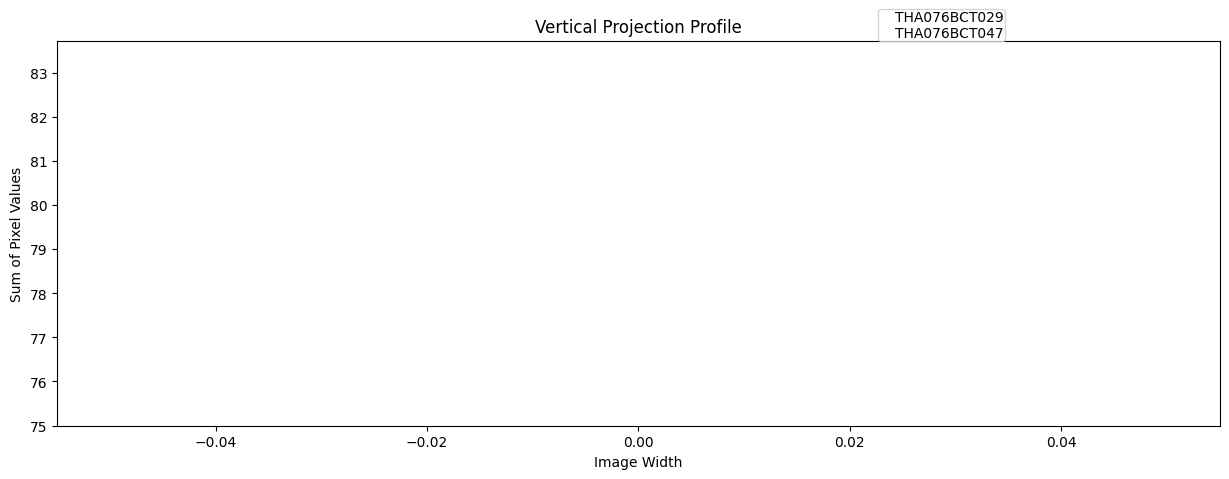

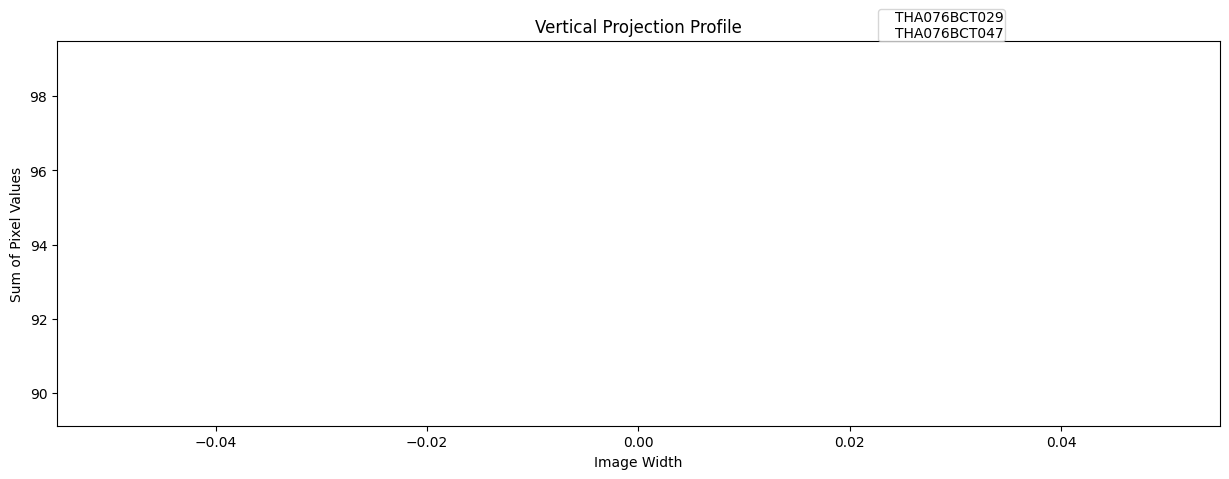

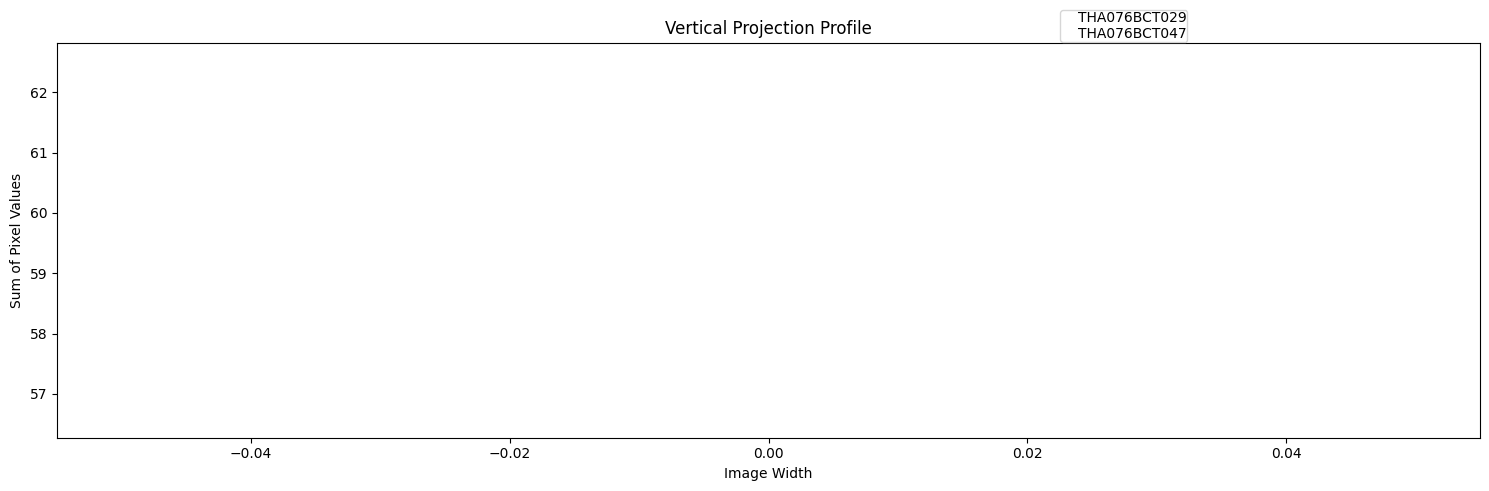

In [34]:
plt.figure(figsize=(15, 5))
for i in range(3):
  random_index = np.random.randint(0, 41000)
  image = X_train.T[random_index]
  vertical_profile = np.sum(image, axis=0)
  plt.figure(figsize=(15, 5))
  plt.plot(vertical_profile)
  plt.title('Vertical Projection Profile')
  plt.xlabel('Image Width')
  plt.ylabel('Sum of Pixel Values')
  legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
  ]
  plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.7, 1.1), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.tight_layout()
plt.show()

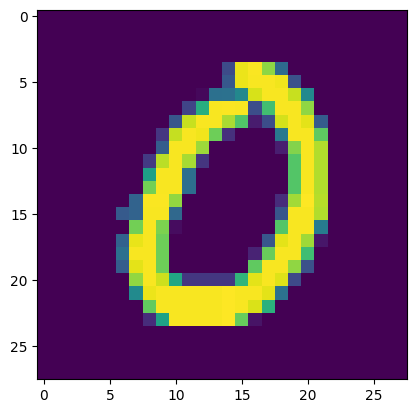

In [14]:


img = np.reshape(image, (28,28))
plt.imshow(img)

In [15]:
Y_train[random_index]

0

**FUNTIONS**

1. Initialize parameters

In [16]:
def init_params():
#     # Number of nodes in the input layer
#     n_input = 784

#     # Number of nodes in the hidden layer
#     n_hidden = 10

#     # Number of nodes in the output layer
#     n_output = 10
    #Initialize weights and biases for the hidden layer
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5

    # Initialize weights and biases for the output layer
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

2. RELU

In [17]:
def ReLU(Z):
    return np.maximum(Z, 0)

3. SOFTMAX

In [18]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

4. RELU DERIVATIVE

In [19]:
def ReLU_deriv(Z):
    return Z > 0

5. Forward Propagation

In [20]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

6. One Hot

In [21]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

7. Backward Propagation

In [22]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / x * dZ2.dot(A1.T)
    db2 = 1 / x * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / x * dZ1.dot(X.T)
    db1 = 1 / x * np.sum(dZ1)
    return dW1, db1, dW2, db2

8.Update Parameters

In [23]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

9.Get predictions

In [24]:
def get_predictions(A2):
    return np.argmax(A2, 0)

10. Accuracy

In [25]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

11. Gradient Descent

In [26]:
# accuracy_scores = []  # To store accuracy scores at different iterations
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracy_scores = []  # To store accuracy scores at different iterations

    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 5 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            print(accuracy)
            accuracy_scores.append((i, accuracy))
     # Convert accuracy_scores to separate lists for plotting
    iterations, accuracies = zip(*accuracy_scores)

    # Plotting accuracy vs iterations
    plt.plot(iterations, accuracies)
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
    ]
    plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.7, 1.1), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
    plt.show()
    return W1, b1, W2, b2


Iteration:  0
[0 3 1 ... 7 3 3] [5 8 6 ... 7 9 2]
0.12763414634146342
Iteration:  5
[8 3 0 ... 7 3 1] [5 8 6 ... 7 9 2]
0.16634146341463416
Iteration:  10
[8 3 0 ... 7 8 2] [5 8 6 ... 7 9 2]
0.20321951219512194
Iteration:  15
[0 3 0 ... 7 8 2] [5 8 6 ... 7 9 2]
0.23692682926829267
Iteration:  20
[0 3 6 ... 7 8 2] [5 8 6 ... 7 9 2]
0.27395121951219514
Iteration:  25
[0 3 6 ... 7 8 2] [5 8 6 ... 7 9 2]
0.3128292682926829
Iteration:  30
[0 3 6 ... 7 8 2] [5 8 6 ... 7 9 2]
0.3587560975609756
Iteration:  35
[0 3 6 ... 7 8 2] [5 8 6 ... 7 9 2]
0.4038536585365854
Iteration:  40
[5 3 6 ... 7 8 2] [5 8 6 ... 7 9 2]
0.44465853658536586
Iteration:  45
[5 3 6 ... 7 8 2] [5 8 6 ... 7 9 2]
0.4806341463414634
Iteration:  50
[5 3 6 ... 7 8 2] [5 8 6 ... 7 9 2]
0.5116341463414634
Iteration:  55
[5 3 6 ... 7 8 2] [5 8 6 ... 7 9 2]
0.5381707317073171
Iteration:  60
[5 3 6 ... 7 8 2] [5 8 6 ... 7 9 2]
0.5587804878048781
Iteration:  65
[5 3 6 ... 7 8 2] [5 8 6 ... 7 9 2]
0.5779024390243902
Iteration:  70
[

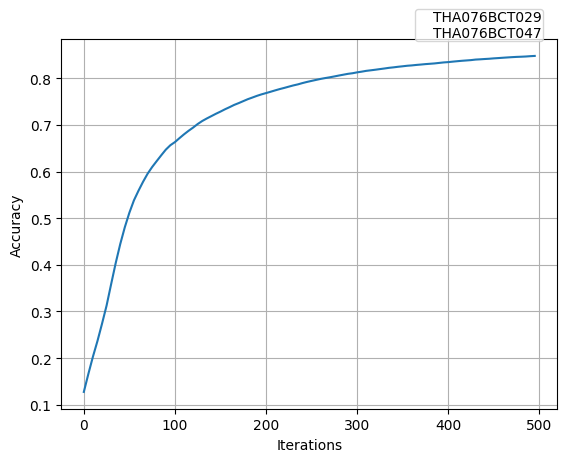

In [27]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

12. Make predictions

In [28]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

13. Test Predictions

In [29]:
def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  5


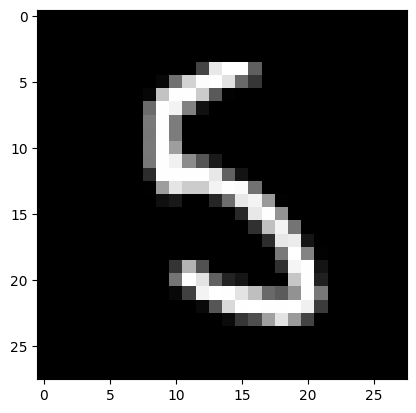

Prediction:  [8]
Label:  8


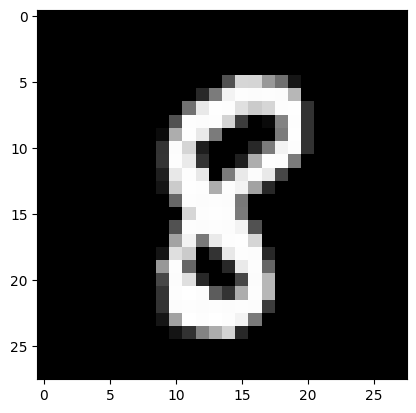

Prediction:  [6]
Label:  6


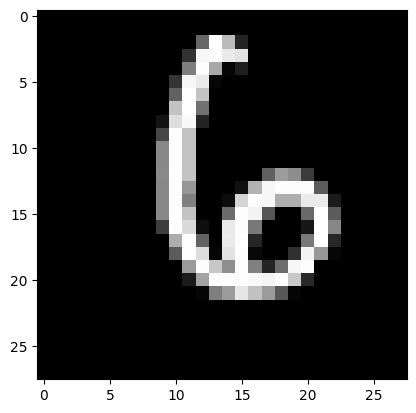

Prediction:  [1]
Label:  1


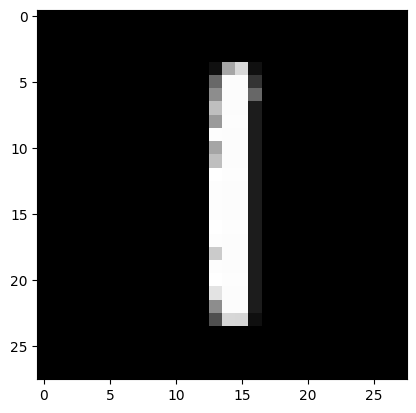

In [30]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [31]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 0 2 4 7 9 4 3 5 3 3 9 6 7 1 7 4 9 4 3 1 3 9 1 3 9 5 8 3 4 9 0 7 4 5 4 0
 1 5 0 5 8 7 3 4 4 0 4 9 2 6 4 3 9 9 1 5 1 9 9 0 2 1 1 8 9 7 6 0 6 6 0 3 8
 7 5 2 9 4 0 4 4 7 3 8 0 6 6 1 6 0 6 9 7 6 6 0 5 4 1 3 3 3 2 8 9 9 8 6 0 5
 7 8 5 0 3 1 9 2 0 7 5 9 7 1 8 9 6 1 9 7 7 0 3 8 5 9 8 8 8 2 5 5 2 9 0 4 6
 7 7 1 7 9 0 4 2 8 6 7 8 1 9 9 5 1 9 4 6 4 4 9 9 2 5 0 0 5 3 9 9 6 0 4 3 7
 0 9 3 6 5 0 8 3 7 8 6 8 4 6 1 2 4 1 6 6 7 9 6 1 8 7 2 3 6 9 8 4 3 7 7 3 5
 0 9 6 9 2 1 1 1 0 1 9 9 4 8 3 8 3 5 5 2 2 8 8 1 1 3 1 2 0 8 6 2 3 9 6 6 3
 8 8 3 1 3 1 0 1 3 4 1 3 4 0 5 4 0 2 2 3 3 7 2 7 9 8 8 6 7 2 4 1 2 9 0 4 7
 2 1 7 5 4 6 5 6 0 4 6 4 0 5 1 2 1 6 6 4 0 1 2 0 1 5 9 1 4 1 5 4 5 9 9 9 5
 2 7 0 3 0 1 1 2 0 4 2 8 7 1 2 9 8 2 0 1 1 9 9 1 3 0 7 0 4 0 2 8 5 4 5 0 7
 5 8 5 3 5 5 7 2 3 9 6 5 0 3 2 3 7 4 9 5 3 0 5 8 9 7 0 7 9 2 6 6 6 6 7 2 3
 6 6 5 9 9 3 2 0 9 9 4 9 7 1 8 2 6 0 1 0 6 5 0 8 0 1 0 9 2 3 2 2 7 4 6 3 9
 5 7 8 9 5 5 9 5 2 1 0 4 5 9 5 2 0 1 0 3 7 7 9 4 7 6 3 6 2 5 5 0 2 8 9 9 6
 7 5 4 0 4 2 1 4 1 6 0 1 

0.834

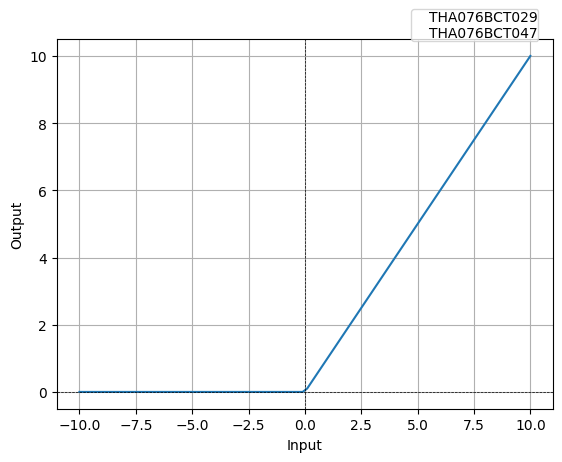

In [32]:
x = np.linspace(-10, 10, 100)  # Generate 100 points from -10 to 10
y = ReLU(x)

plt.plot(x, y, label='ReLU')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add x-axis
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Add y-axis
plt.xlabel('Input')
plt.ylabel('Output')
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.7, 1.1), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.grid()
plt.show()

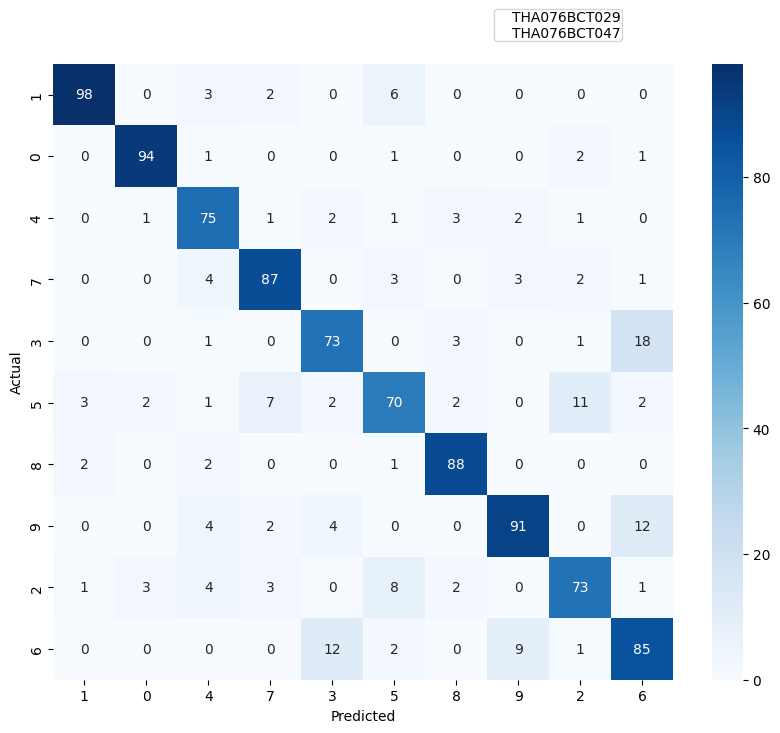

In [33]:
import seaborn as sns
conf_matrix = confusion_matrix(Y_dev, dev_predictions)

# Plotting confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.7, 1.1), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.show()